In [3]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../DeepGaze")
from scipy.ndimage import zoom
from scipy.special import logsumexp
from scipy.io import savemat
import torch
import matplotlib.image as mpimg
sys.path.append("../DeepGaze")
import deepgaze_pytorch
import cv2

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from image_processing.utils import read_video
from image_processing.computational_models import compute_dg_saliency
from general_utils.utils import print_wise


In [4]:
# if torch.cuda.is_available():
#     device = "cuda"
# elif torch.backends.mps.is_available():
#     device = "mps"
# else:
#     device = "cpu"
# # end if torch.cuda.is_available():

In [5]:
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True)
compute_dg_saliency(paths, 1, "IMG_4704.mp4", model, .1)

Loaded pretrained weights for efficientnet-b5


KeyboardInterrupt: 

In [ ]:
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True)
compute_dg_saliency(paths, 1, "IMG_4704.mp4", model, .1)

Loaded pretrained weights for efficientnet-b5


Using cache found in /Users/tizianocausin/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /Users/tizianocausin/.cache/torch/hub/pytorch_vision_v0.6.0


08:08:16 - rank 1 IMG_4704.mp4 read successfully
08:08:35 - frame 0 computed
08:08:44 - frame 1 computed


KeyboardInterrupt: 

In [11]:
fn = "IMG_4664.mp4"
vid = read_video(paths, 1, fn)

09:18:00 - rank 1 IMG_4664.mp4 read successfully


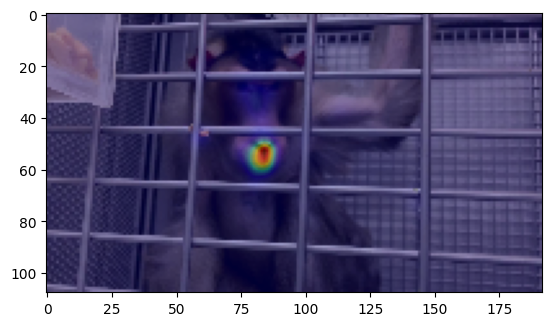

In [18]:
from scipy.io import loadmat
features = loadmat(f"/Volumes/LivingstoneLab/tiziano/models/dgIIE_{fn[:-4]}.mat")['features']
features_map = features.reshape(108, 192,5, order="F")
plt.imshow(cv2.resize(vid[0,:,:,:],(192, 108)))
plt.imshow(features_map[:,:,0], alpha=0.4, cmap='jet')

In [ ]:
import tensorflow.compat.v1 as tf

tf.reset_default_graph()
tf.disable_v2_behavior()
check_point = '../deep_gaze/ICF.ckpt'  # DeepGaze II
new_saver = tf.train.import_meta_graph('{}.meta'.format(check_point))
input_tensor = tf.get_collection('input_tensor')[0]
centerbias_tensor = tf.get_collection('centerbias_tensor')[0]
log_density = tf.get_collection('log_density')[0]
log_density_wo_centerbias = tf.get_collection('log_density_wo_centerbias')[0]
# resize_tuple = (int(width*0.1),round(height*.1))
# dg_saliency_model=np.zeros((resize_tuple[1]*resize_tuple[0],frame_count)) #preallocation
# Read and display frames
# count=0
# while cap.isOpened():
#   ret, frame = cap.read()

#   image_data = frame[np.newaxis, :, :, :]  # BHWC, three channels (RGB), vectorizes the three channels

#     #tf.reset_default_graph()




Instructions for updating:
non-resource variables are not supported in the long term
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


In [ ]:
image_data = input

In [ ]:
with tf.Session() as sess:
    new_saver.restore(sess, check_point)
    log_density_prediction_ICF = sess.run(log_density, {
    input_tensor: image_data[np.newaxis, :,:,:],
    centerbias_tensor: np.zeros((1,*image_data.shape[:2],1)),
    })

INFO:tensorflow:Restoring parameters from ../deep_gaze/ICF.ckpt


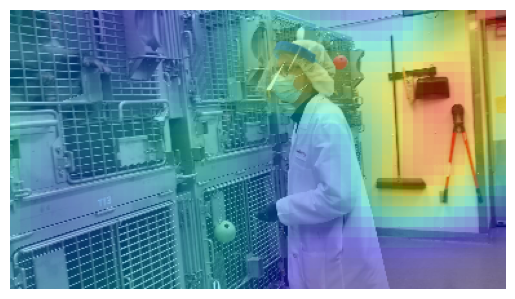

In [ ]:
plt.imshow(image_data, alpha=1)             # background image
plt.imshow(np.exp(log_density_prediction_ICF.squeeze()), cmap='jet', alpha=.4)  # semi-transparent heatmap overlay
plt.axis('off')
plt.show()